### This notebook plots predicted vs. experimental ddG values using matplotlib 

In [1]:
# Change the paths here, if needed

expt_data_file = 'experimental_affinity.csv'
calc_data_file = '../tutorial/ddg_to_center.csv'

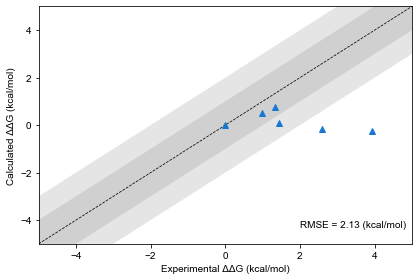

In [2]:
#!python3
#

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = '12'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

def rmse(x1, x2):
    return np.sqrt(((x1 - x2) ** 2).mean())

expt_data = pd.read_csv(expt_data_file)
x_vals = expt_data.sort_values('Name')['dg']
x_vals -= x_vals[0]

calc_data = pd.read_csv(calc_data_file)
y_vals = calc_data.sort_values('Name')['ddg']

data_rms = rmse(x_vals, y_vals)

#colors = ['#04284C', '#074F94', '#1977D2', '#519AE1', '#A2CCF4']
colors = ['#1977D2', '#FFE40D', '#FA0C28']
markers = ['.', '+', 'x', '^', 'v', 'd']
lims = [-5, 5]
nrows = 1
ncols = 1

points1 = np.array([[lims[0], lims[0]],
                    [lims[0], lims[0] + 1],
                    [lims[1] - 1, lims[1]],
                    [lims[1], lims[1]],
                    [lims[1], lims[1] - 1],
                    [lims[0] + 1, lims[0]]])
points2 = np.array([[lims[0], lims[0]],
                    [lims[0], lims[0] + 2],
                    [lims[1] - 2, lims[1]],
                    [lims[1], lims[1]],
                    [lims[1], lims[1] - 2],
                    [lims[0] + 2, lims[0]]])
    
fig, ax = plt.subplots(nrows, ncols)

ax.plot(x_vals, y_vals, linestyle='None', marker=markers[3], c=colors[0])

# Set labels and ticks
ax.set_ylabel('Calculated \u0394\u0394G (kcal/mol)')        
ax.set_xlabel('Experimental \u0394\u0394G (kcal/mol)')

ax.set_xlim(lims)
ax.set_ylim(lims)

# Plot y=x line
ax.plot(lims, lims, lw=0.75, c='#000000', zorder=-10, linestyle='dashed')

# Plot regions
ax.fill(points2[:, 0], points2[:, 1], '#E5E5E5', zorder=-20, edgecolor=None)
ax.fill(points1[:, 0], points1[:, 1], '#D0D0D0', zorder=-20, edgecolor=None)

# Set legend
ax.text(2, -4.3, s='RMSE = {:0.2f} (kcal/mol)'.format(data_rms), fontsize='10')

plt.tight_layout()
plt.subplots_adjust(hspace=0.0, wspace=0.0)
plt.show()
